## A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. 

## Importing necessary libraries

In [158]:

import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv(r"C:\Users\yavar\DS_Assignments\22.Simple Linear Regression\calories_consumed.csv")
data2=df.copy()

In [289]:
df.head(13)

,We,caco
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [126]:
df.rename(columns={'Weight gained (grams)':'We','Calories Consumed':'caco'}, inplace=True)

In [127]:
df.describe()

,We,caco
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [128]:
df.isnull().sum()

We      0
caco    0
dtype: int64

## Box plot, Scatter plot and Skewness

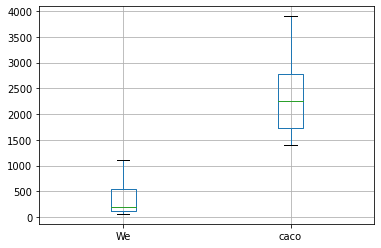

In [129]:
df.boxplot();

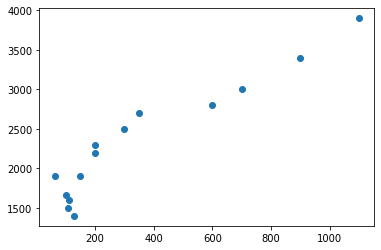

In [239]:
plt.scatter(df['We'],df['caco']);

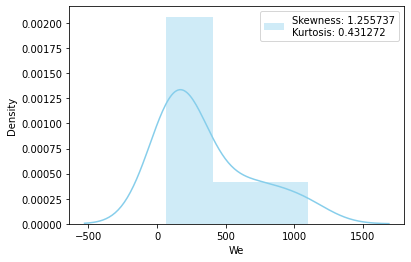

In [196]:
sns.distplot( df['We'] , color="skyblue",label = "Skewness: %f" % df['We'].skew() + "\n" + "Kurtosis: %f" % df['We'].kurt())
plt.legend();

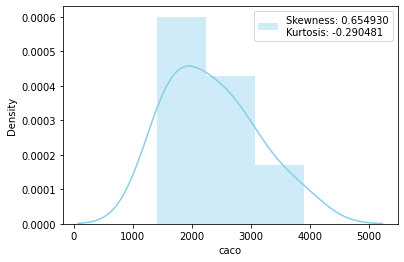

In [238]:
sns.distplot( df['caco'] , color="skyblue",label = "Skewness: %f" % df['caco'].skew() + "\n" + "Kurtosis: %f" % df['caco'].kurt())
plt.legend();


In [247]:
corre = np.corrcoef(df['We'],df['caco'])
print(corre)

[[1.         0.94699101]
 [0.94699101 1.        ]]


In [249]:
cov = np.cov(df['We'],df['caco'])
print(cov)

[[111350.68131868 237669.45054945]
 [237669.45054945 565668.68131868]]


# Simple Linear Regression 

In [292]:
x=np.array(we).reshape(-1,1)
y=np.array(caco).reshape(-1,1)

In [293]:
model = LinearRegression()
model.fit(x,y)

print(model.score(x, y))

0.8967919708530552


In [295]:
regression_model_mse = mean_squared_error(x,y)

MSE = math.sqrt(regression_model_mse)
print("MSE             : ", MSE)
Rsqr = model.score(x,y)
print("R squared value :",Rsqr)

MSE             :  2029.670838901154
R squared value : 0.8967919708530552


In [296]:
print("Coefficient b0 :",model.coef_[0])
print("Intercept b1   :",model.intercept_[0])

Coefficient b0 : [2.13442296]
Intercept b1   : 1577.2007020291894


In [314]:
pred1= model.predict(pd.DataFrame(df['We']))

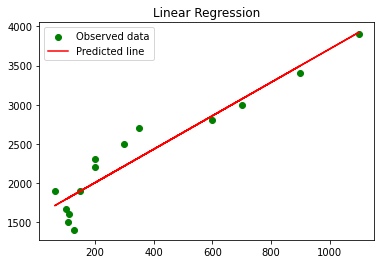

In [315]:
plt.scatter(we,caco, color = 'green')
plt.plot(df.We,pred1,'r')
plt.title("Linear Regression")
plt.legend(['Observed data','Predicted line'])
plt.show()

In [298]:
y_predicted = model.predict(x)
y_actual = y
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                           #get the ^

print(rmse(y_predicted,y_actual))

232.8335007096089


In [300]:
print("Prediction by the model: ", model.predict([[100]])) # actual value is 1670

Prediction by the model:  [[1790.64299779]]


In [286]:
import statsmodels.formula.api as smf

model = smf.ols('caco ~ we',data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   caco   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           2.86e-07
Time:                        19:54:04   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1577.2007    100.541     15.687      0.000    1358.141    1796.260
we             2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 was 0.897 
This is the best model.
